In [1]:
# Load modules
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import cartopy.feature as cf                                                                                                        
from pathlib import Path
import psyplot.project as psy
import sys
from timefunctions import *
import varfunctions
import datetime as dt

from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# Read in nc file

# If the nc file is missing grid information (no variables clon_bnds and clat_bnds),
# the information needs to be added with a grid file.
# The module "grid" contains a function to check if the grid information is available and a function to add it.

# Enter the path to your nc file or use one of the example datasets:
#iconvis.get_example_data()
# filename = 'lfff00000000.nc'

# import datetime as dt
# simdate = dt.datetime(2019,9,12,12,00)
# plotdate = dt.datetime(2019,9,13,12,30)
# ltdt = plotdate-simdate
# ltdt_hf=ltdt.seconds/60/60 # hour fraction
# lt= ltdt.days*24+ltdt_hf

plotdate = dt.datetime(2019,9,13,8,30)
simdate = dt.datetime(2019,9,12,12,00)
lt = get_lt(plotdate,simdate)

print(lt)
filename = lfff_name(lt)
nc_file = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'+filename
# If necessary, add the corresponding grid file:
grid_file = '../data/example_data/grids/ICON-1E_DOM01.nc'

if iconvis.check_grid_information(nc_file):
    print('The grid information is available')
    data = psy.open_dataset(nc_file)
else:
    print('The grid information is not available')
    data = iconvis.combine_grid_information(nc_file,grid_file)

print(filename)

20.5
The grid information is available
lfff00203000.nc


In [3]:
# Check which variables are available
for var in data.variables:
    print(var)

time
clon
clon_bnds
clat
clat_bnds
height
height_2
depth
depth_bnds
depth_2
height_3
height_3_bnds
height_4
plev
plev_bnds
plev_2
plev_2_bnds
plev_3
plev_3_bnds
T_2M
qv_2m
u_10m
v_10m
alhfl_s
athb_s
athd_s
athu_s
ashfl_s
asob_s
asod_s
SKT
SMI
T_SO
PS
tot_prec
U
V
W
T
TKE
P
QV
QC
tqv
tqc
tqi
tqr
tqs
tqg
clc
clcl
clcm
clch
clct
fis
PMSL
RELHUM_2M
td_2m
tetfl_turb
thu_s
lwflx_up
lwflx_dn
sou_s
swflx_up
swflx_dn
shfl_s
lhfl_s


In [4]:
# show figures after they are drawn or updated
psy.rcParams['auto_show'] = True

%matplotlib inline
%config InlineBackend.close_figures = False

# from varfunctions import calc_vel
# # print(data['T_2M'])
# # data['vel_10m'] = calc_vel(data['u_10m'],data['v_10m'])
# # import numpy as np
# vel_10m_a=[]
# for i in range (0, 895687):
#     vel_10m = calc_vel(data.u_10m[0,0,i],data.u_10m[0,0,i])
#     vel_10m_a.append(vel_10m) 
# data.append(vel_10m_a)
# # Path(icon_dir, lfff_name(lt))

In [5]:
print((data.u_10m[0,0,:]))

<xarray.DataArray 'u_10m' (ncells: 895688)>
[895688 values with dtype=float64]
Coordinates:
    time      datetime64[ns] 2019-09-13T08:30:00
    clon      (ncells) float32 ...
    clat      (ncells) float32 ...
    height_2  float64 10.0
Dimensions without coordinates: ncells
Attributes:
    standard_name:                u_10m
    long_name:                    zonal wind in 10m
    units:                        m s-1
    param:                        2.2.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1


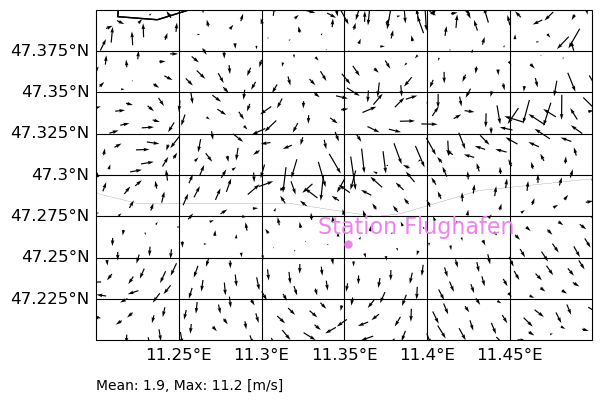

In [6]:
import locfunctions as lf
area=lf.zoom

ppv = psy.plot.mapvector(data, 
                    name=[['u_10m', 'v_10m']], 
                    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
                    arrowsize=40)
#annotations


fig = plt.gcf()
for locmark in area.locmarks:
    pos_lon, pos_lat = iconvis.add_coordinates(locmark.lon,locmark.lat,area.lonmin,area.lonmax,area.latmin,area.latmax)
    fig.axes[0].plot(pos_lon, pos_lat,color=locmark.color,marker='.', markersize=10, transform=fig.axes[0].transAxes) 
    if locmark.name=='Station Flughafen':
        fig.axes[0].text(pos_lon-0.06, pos_lat+0.03,locmark.name, transform=fig.axes[0].transAxes,color=locmark.color,fontsize=16)

ppv.update(lakes = True, borders = True, rivers = True)

In [7]:
print(len(area.locmarks))

9


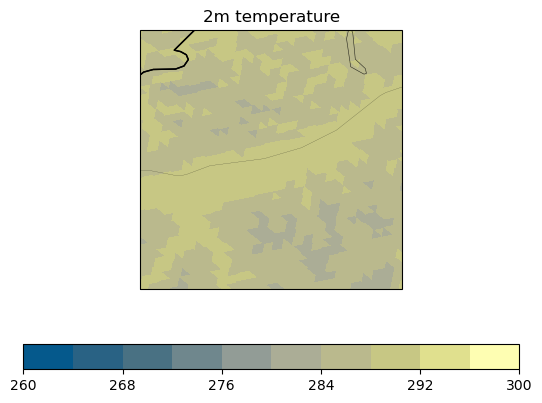

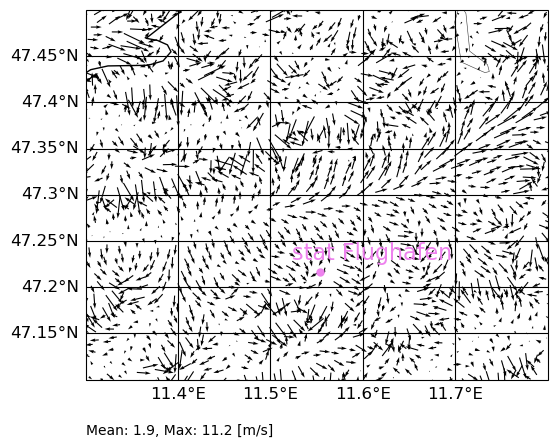

In [11]:
latmin = 47.1
lonmin = 11.3
latmax = 47.5
lonmax = 11.8

ppv.update(map_extent = [lonmin, lonmax, latmin, latmax])

In [29]:
print(len(area.locmarks))

1


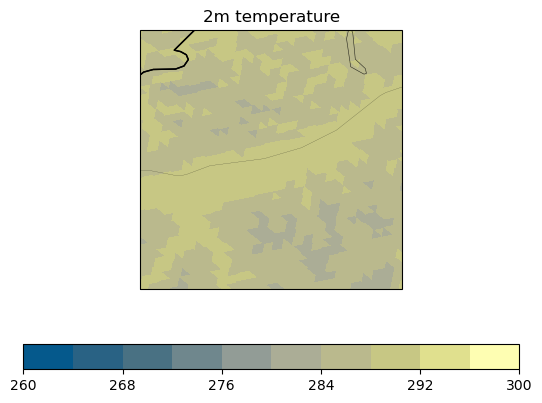

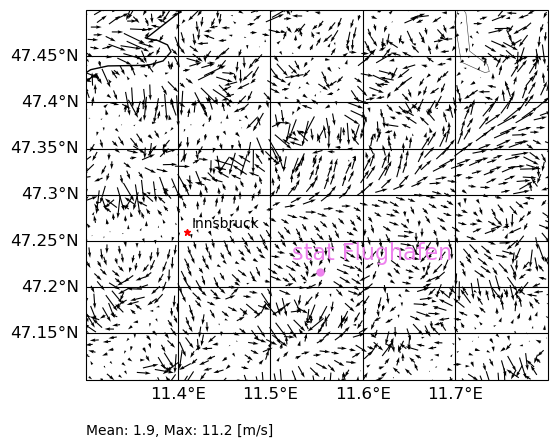

In [12]:
# Add coordinates Innsbruck
lon = 11.41
lat = 47.26
pos_lon,pos_lat = iconvis.add_coordinates(lon,lat,lonmin,lonmax,latmin,latmax)

# go to matplotlib level for adding coordinate                                                                                                    
fig = plt.gcf()
fig.axes[0].plot(pos_lon, pos_lat,'r',marker='*', markersize=5, transform=fig.axes[0].transAxes) 
fig.axes[0].text(pos_lon+0.01, pos_lat+0.01, 'Innsbruck', transform=fig.axes[0].transAxes)

pp.update()

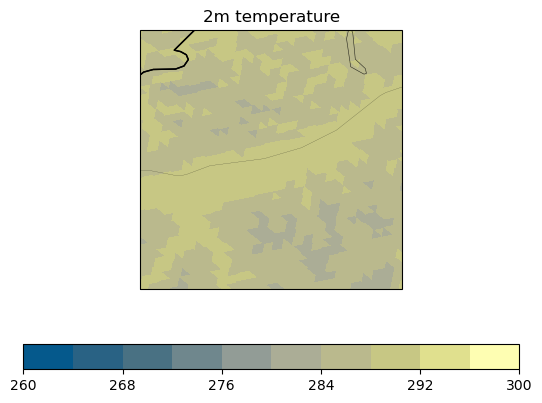

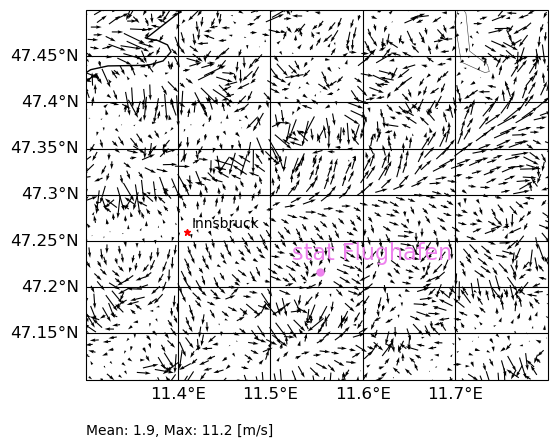

In [13]:
# save figure
pp.update()
output_file = 'mapplot_test'
plt.savefig(output_file)

In [14]:
#test_op_path = /store/s83/tsm/ICON-1E/FCST22/22100500_614/grib/i1effsurf008_000
